In [1]:
# python version 3.6.9 #
import pandas as pd # 1.1.5
import numpy as np # 1.19.5
import matplotlib.pyplot as plt
import matplotlib # 3.3.4
import scipy.stats as st # scipy 1.5.4
import random

matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"
plt.rc('text', usetex=False)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 16})
plt.style.use('source_data/included/figure.style')
cm = plt.cm.get_cmap('tab20c')


MannwhitneyuResult(statistic=0.0, pvalue=0.02591496360895484)
MannwhitneyuResult(statistic=0.0, pvalue=0.02591496360895484)


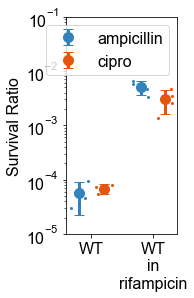

In [2]:
cm = plt.cm.get_cmap('tab20c')

table = pd.read_csv('source_data/included/figED8_rifampicin_CFUs.csv',sep=',',index_col=0)
table = table.loc[table['type']=='abx']
np.random.seed(seed=2)
random.seed(2)
fig,ax = plt.subplots(figsize=(2,4))
y1 = table['amp']/(table['overnight pre']/100)
y1 = y1.dropna()
y = y1.mean()
err = y1.std()
ax.errorbar(-0.2,y,yerr=err,fmt=".",markersize=20,capsize=5,color=cm(0),label='ampicillin')
l = []
[l.append(np.random.choice([-1, 1]) * random.uniform(0.09,0.14)) for i in range(0,len(y1))]
ax.scatter([-0.2 + i for i in l],y1,s=4,color=cm(0))
y1 = table['cipro']/(table['overnight pre']/100)
y1 = y1.dropna()
y = y1.mean()
err = y1.std()
ax.errorbar(0.2,y,yerr=err,fmt=".",markersize=20,capsize=5,color=cm(4),label='cipro')
l = []
[l.append(np.random.choice([-1, 1]) * random.uniform(0.09,0.14)) for i in range(0,len(y1))]
ax.scatter([0.2 + i for i in l],y1,s=4,color=cm(4))
y1 = table['rif + amp']/(table['overnight pre']/100)
y1 = y1.dropna()
y = y1.mean()
err = y1.std()
ax.errorbar(0.8,y,yerr=err,fmt=".",markersize=20,capsize=5,color=cm(0))
l = []
[l.append(np.random.choice([-1, 1]) * random.uniform(0.09,0.14)) for i in range(0,len(y1))]
ax.scatter([0.8 + i for i in l],y1,s=4,color=cm(0))

y1 = table['rif + cipro']/(table['overnight pre']/100)
y1 = y1.dropna()
y = y1.mean()
err = y1.std()
ax.errorbar(1.2,y,yerr=err,fmt=".",markersize=20,capsize=5,color=cm(4))
l = []
[l.append(np.random.choice([-1, 1]) * random.uniform(0.09,0.14)) for i in range(0,len(y1))]
ax.scatter([1.2 + i for i in l],y1,s=4,color=cm(4))

ax.set_yscale('log')
ax.set_ylim(10**-5,10**-1)
ax.set_xticks([0,1])
ax.set_xticklabels(['WT','WT\nin\nrifampicin'])
ax.set_ylabel('Survival Ratio')
ax.legend()
plt.savefig('figures/figED8b_abx_survival.pdf')

x = (table['rif + amp']/(table['overnight pre']/100)).dropna()
y = (table['amp']/(table['overnight pre']/100)).dropna()
print(st.mannwhitneyu(x,y))

x = (table['rif + cipro']/(table['overnight pre']/100)).dropna()
y = (table['cipro']/(table['overnight pre']/100)).dropna()
print(st.mannwhitneyu(x,y))

0.861587624
WilcoxonResult(statistic=0.0, pvalue=0.0625)


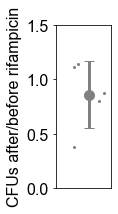

In [3]:
table = pd.read_csv('source_data/included/figED8_rifampicin_CFUs.csv',sep=',',index_col=0)
table = table.loc[table['type']=='rif_only']
np.random.seed(seed=2)
random.seed(2)
fig,ax = plt.subplots(figsize=(1,3))
y1 = table['survival']
y = y1.mean()
err = y1.std()
ax.errorbar(0,y,yerr=err,fmt=".",markersize=20,capsize=5,color='grey')
l = []
[l.append(np.random.choice([-1, 1]) * random.uniform(0.09,0.14)) for i in range(0,len(y1))]
ax.scatter(l,y1,s=4,color='grey')

ax.set_ylim(0,1.5)
ax.set_xlim(-0.3,0.2)
ax.set_xticks([])
ax.set_ylabel('CFUs after/before rifampicin')

plt.savefig('figures/figED8c_CFUs.pdf')
print(y1.mean())

x = table['overnight pre']
y = table['1 hr rif']
print(st.wilcoxon(x,y))